In [159]:
import numpy as np
import pandas as pd

In [160]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [161]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5239,ham,"Jay wants to work out first, how's 4 sound?",NaN,NaN,NaN
2233,ham,Good Morning plz call me sir,NaN,NaN,NaN
2256,ham,"Just checked out, heading out to drop off my s...",NaN,NaN,NaN
1946,ham,Hey we can go jazz power yoga hip hop kb and y...,NaN,NaN,NaN
997,ham,Not a lot has happened here. Feels very quiet....,NaN,NaN,NaN


In [162]:
df.shape

(5572, 5)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [164]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [165]:
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [166]:
df = df.rename(columns = {'v1':'target' ,'v2':'text'})

In [167]:
df.sample(5)

,target,text
2587,ham,"Aight, see you in a bit"
4538,ham,"Party's at my place at usf, no charge (but if ..."
1897,ham,"Aight, sounds good. When do you want me to com..."
1841,ham,I am in your office na.
1381,ham,We spend our days waiting for the ideal path t...


In [168]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [169]:
df['target'] = encoder.fit_transform(df['target'])

In [170]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [171]:
df.duplicated().sum()

403

In [172]:
df = df.drop_duplicates(keep = "first")

In [173]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

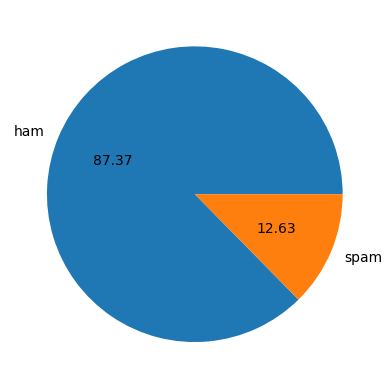

In [174]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts() , labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [175]:
import nltk


In [176]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [177]:
df['num_charcters'] = df['text'].apply(len)

In [178]:
df['num_words']  = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [179]:
df['num_sentences'] =  df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [180]:
df[['num_charcters','num_words','num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [181]:
df[df['target'] == 0][['num_charcters','num_words','num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [182]:
df[df['target'] == 1][['num_charcters','num_words','num_sentences']].describe()

,num_charcters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [183]:
import seaborn as sns

<AxesSubplot: xlabel='num_charcters', ylabel='Count'>

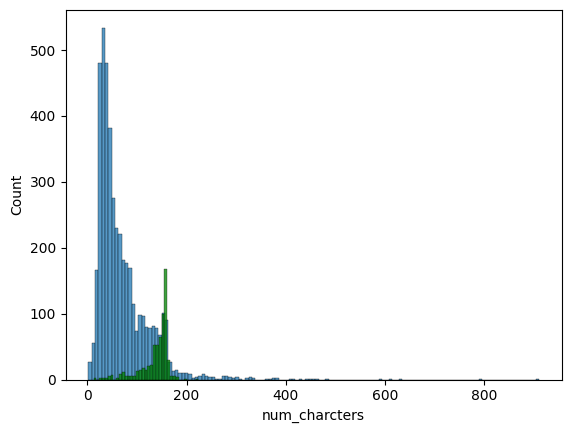

In [184]:
sns.histplot(df[df['target'] == 0]['num_charcters'])
sns.histplot(df[df['target'] == 1]['num_charcters'] , color='green')


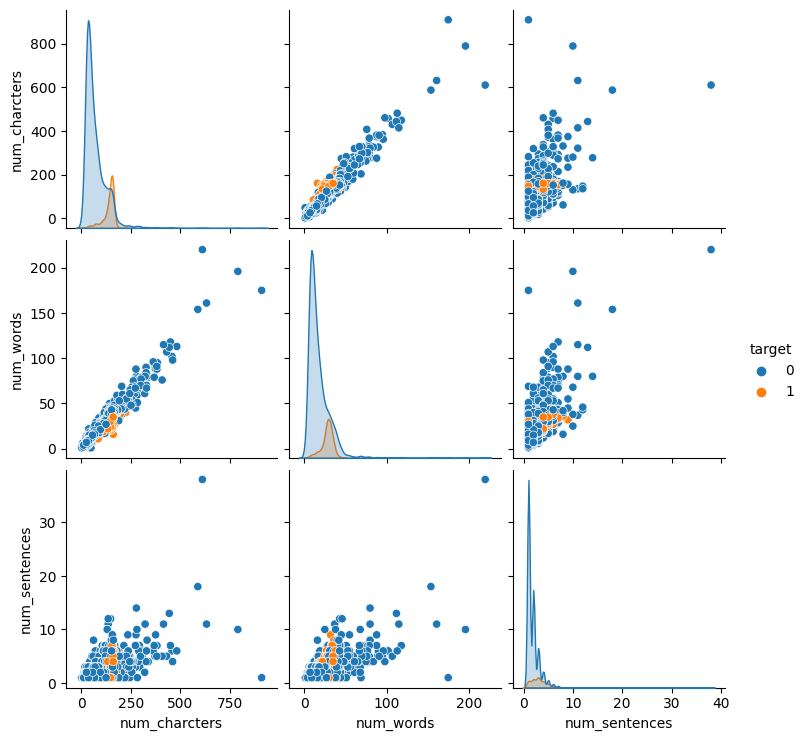

In [185]:
sns.pairplot(df ,hue= 'target')

In [186]:
df.corr()

,target,num_charcters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_charcters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot: >

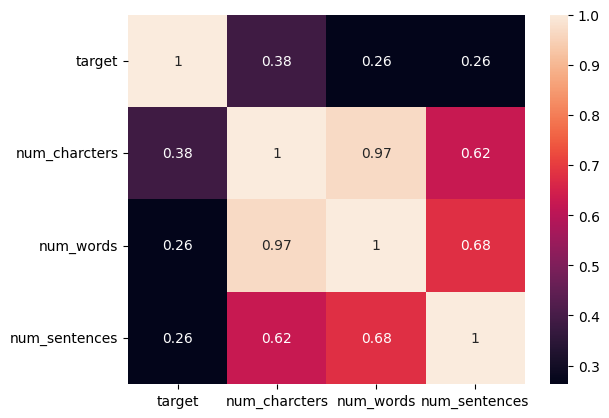

In [187]:
sns.heatmap(df.corr(), annot = True)

In [188]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import pandas as pd

# Download the stopwords resource
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    # Removing special chars
    y = [i for i in text if i.isalnum()]

    # Filtering stopwords and punctuation
    y = [ps.stem(i) for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [189]:
df['transformed_text'] = df['text'].apply(transform_text)

In [190]:
df.head()

,target,text,num_charcters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


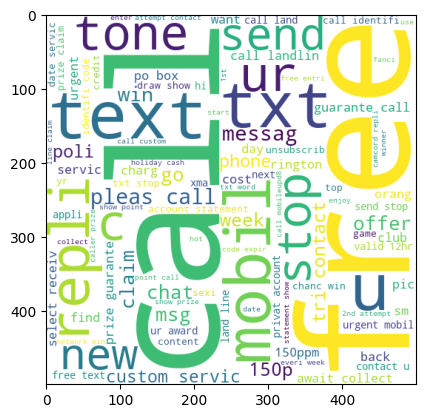

In [191]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

plt.imshow(spam_wc)

In [192]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [193]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [194]:
X.shape

(5169, 3000)

In [195]:
y = df['target'].values

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [197]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [198]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [199]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [200]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [201]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm          import SVC
from sklearn.naive_bayes  import MultinomialNB
from sklearn.tree         import DecisionTreeClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import BaggingClassifier
from sklearn.ensemble     import ExtraTreesClassifier
from sklearn.ensemble     import GradientBoostingClassifier
from xgboost import XGBClassifier


In [203]:
!pip install --upgrade xgboost



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
svc  = SVC(kernel='sigmoid', gamma=1.0)
knc  = KNeighborsClassifier()
mnb  = MultinomialNB()
dtc  = DecisionTreeClassifier(max_depth=5)
lrc  = LogisticRegression(solver='liblinear', penalty='l1')
rfc  = RandomForestClassifier(n_estimators=50, random_state=2)
abc  = AdaBoostClassifier(n_estimators=50, random_state=2)
bc   = BaggingClassifier(n_estimators=50, random_state=2)
etc  = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb  = XGBClassifier(n_estimators=50,random_state=2)

In [205]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [206]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [207]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [208]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [209]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [210]:
# Fit the MultinomialNB model before saving
mnb.fit(X_train, y_train)

# Save the model and vectorizer using pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
